<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../Assets/ATLASOD.gif" style="width:50%"></a>
</CENTER>

<CENTER><h1>Searching for the Higgs boson in the H&#8594;&gamma;&gamma; channel</h1></CENTER>
## Python notebook example

**Introduction**
Let's take a current ATLAS Open Data sample and create a histogram:

In [1]:
import ROOT
from ROOT import TMath
import time

Welcome to ROOTaaS 6.06/08


In [2]:
start = time.time()

Because we would like to use more than one ROOT input file, the best option is to use a TChain object. This allows to "chain" several samples into a single structure that we can later loop over

In [3]:
## f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/2019/GamGam/Data/dataA_yy.root")
    #("Data/dataA_yy.root")
    #("Data/dataB_yy.root")
    #("Data/dataC_yy.root")
    #("Data/dataD_yy.root")
    
## the file called data-All-yy.root is a merged of all data
f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/2019/GamGam/Data/data-All-yy.root")

In [4]:
canvas = ROOT.TCanvas("Canvas","cz",1000,1000)

In [5]:
tree = f.Get("mini")

Now we're going to extract the photons variables

In [6]:
#Invariant mass histograms definition
hist = ROOT.TH1F("h_M_Hyy","Invariant Mass of di-photon system ; Invariant Mass m_{yy} [GeV] ; events",50,80,280)

Here we're filling the variables defined above with the content of those inside the input ntuples

We're creating a histogram for this example. The plan in to fill them with events.

We are selecting below a simple look for them.

The Higgs boson analysis implemented here considers Higgs boson decays into a proton-proton pair. The event selection criteria are:

In [7]:
Photon_1 = ROOT.TLorentzVector()
Photon_2 = ROOT.TLorentzVector()
n = 0
for event in tree:
    n += 1
    ## printing the evolution in number of events
    if(n%10000==0):
        print(n)
    ## checking the trigger    
    if(tree.trigP):
        goodphoton_index = [0]*5
        goodphoton_n = 0
        photon_index = 0
        ##            
        j=0
        ## looping the photons per event
        for j in range(tree.photon_n):
            ##
            if(tree.photon_isTightID[j]):
                ##
                if(tree.photon_pt[j] > 25000 and (TMath.Abs(tree.photon_eta[j]) < 2.37)\
                   and (TMath.Abs(tree.photon_eta[j]) < 1.37 or TMath.Abs(tree.photon_eta[j]) > 1.52)):
                    ##
                    goodphoton_n += 1  #count
                    goodphoton_index[photon_index]=j
                    photon_index += 1
                ## end Pt and eta pre-selection
            ## end on request of quality of the photon
        ## end looping photons in the current event
            
        ## Using the two selected photons
        if(goodphoton_n==2):
            ##
            goodphoton1_index = goodphoton_index[0]
            goodphoton2_index = goodphoton_index[1]
            ## Getting couple of photons with good isolation 
            if((tree.photon_ptcone30[goodphoton1_index]/tree.photon_pt[goodphoton1_index] < 0.065)\
               and (tree.photon_etcone20[goodphoton1_index] / tree.photon_pt[goodphoton1_index] < 0.065)):
                ##
                if((tree.photon_ptcone30[goodphoton2_index]/tree.photon_pt[goodphoton2_index] < 0.065)\
                   and (tree.photon_etcone20[goodphoton2_index] / tree.photon_pt[goodphoton2_index] < 0.065)):
                    ##
                    Photon_1.SetPtEtaPhiE(tree.photon_pt[goodphoton1_index]/1000., tree.photon_eta[goodphoton1_index],\
                                          tree.photon_phi[goodphoton1_index],tree.photon_E[goodphoton1_index]/1000.)
                    Photon_2.SetPtEtaPhiE(tree.photon_pt[goodphoton2_index]/1000., tree.photon_eta[goodphoton2_index],\
                                          tree.photon_phi[goodphoton2_index],tree.photon_E[goodphoton2_index]/1000.)
                    ## Adding the two TLorentz vectors
                    Photon_12 = Photon_1 + Photon_2
                    ## Filling with the mass of the gamma-gamma system
                    hist.Fill(Photon_12.M())
                ## end isolation photon #2
            ## end isolation photon #1
        ## end 2-good photons
    ## end of trigger request
## End loop in the events

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000


#### Final plot

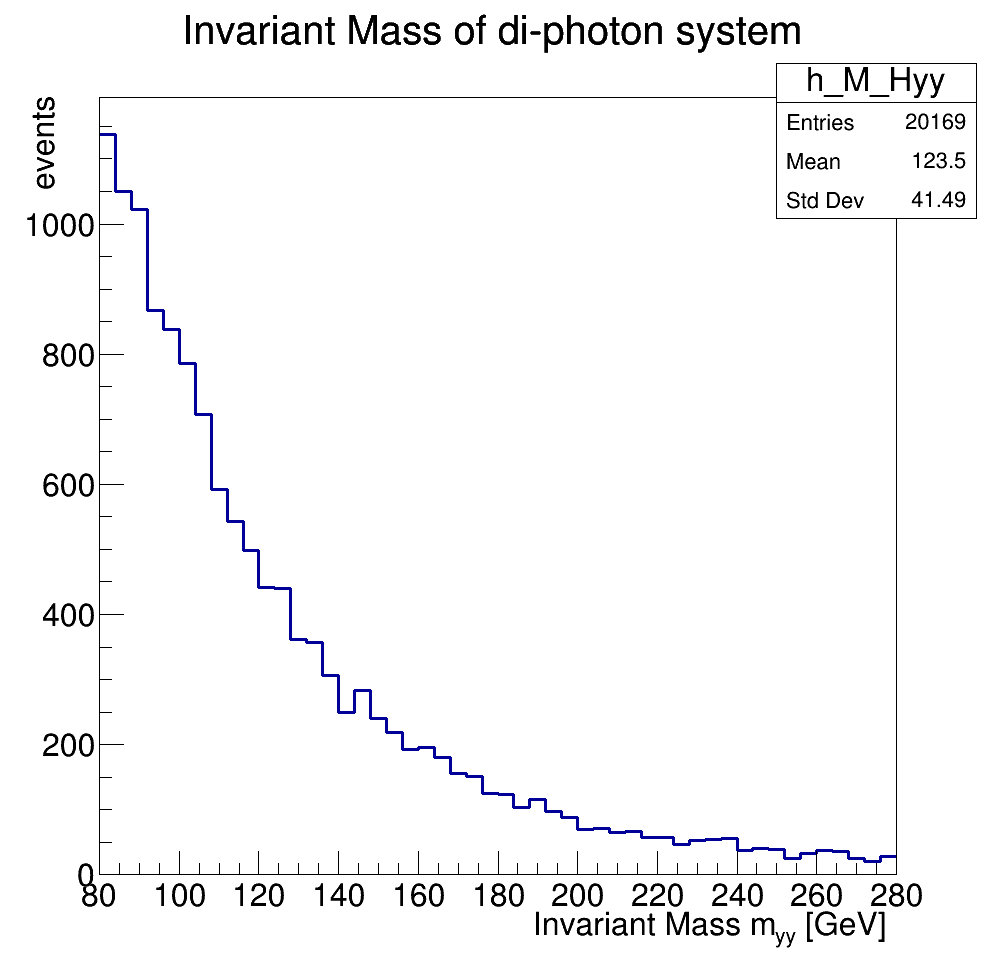

In [8]:
hist.Draw()
canvas.Draw()

#### Log Scale

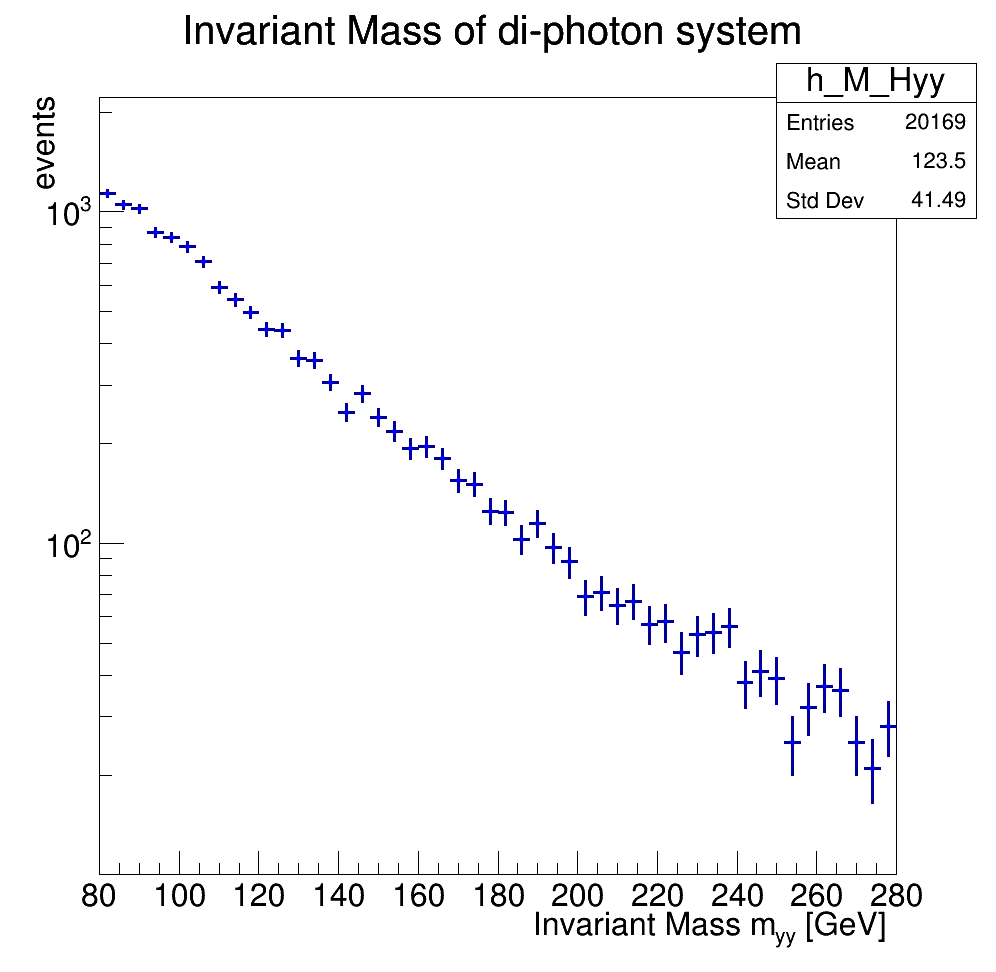

In [9]:
hist.Draw("E")
hist.SetMinimum(10)
canvas.SetLogy()
canvas.Draw()

In [10]:
end = time.time()
duration = end-start
print("Finished in {} min {} s").format(int(duration//60),int(duration%60))

Finished in 0 min 33 s
